In [ ]:
from bs4 import BeautifulSoup
import requests
url= BeautifulSoup('https://www.worldometers.info/coronavirus/','html.parser')
data=requests.get(url)
data


/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.worldometers.info/coronavirus/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
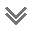

In [ ]:
source=data.text
lxml_data=BeautifulSoup(source, "lxml")
lxml_data

In [ ]:
table_code=lxml_data.table
tags=table_code.find_all('tr')

In [ ]:
data=[]
for tag in tags:
  data.append(tag.text.split('\n')[1:-1])
data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop'],
 ['',
  '',
  'North America',
  '',
  '97,157,558',
  '+648',
  '1,450,048',
  '+78',
  '93,335,899',
  '+1,147',
  '2,371,611',
  '7,112',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  'Asia',
  '',
  '144,539,852',
  '+280,416',
  '1,412,932',
  '+517',
  '123,366,463',
  '+85,289',
  '19,760,457',
  '14,530',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  'South America',
  '',
  '56,452,910',
  '+142',
  '1,291,140',
  '',
  '52,341,896',
  '+645',
  '2,819,874',
  

In [ ]:
final_data=[]
for i in data:
  if i[0] !="":
    final_data.append(i)
print(final_data)


[['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/', '1M pop', '', 'Population', 'Continent', '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop'], ['1', 'USA', '82,133,342', '', '1,013,044 ', '', '80,015,081', '', '1,105,217', '1,592', '245,579', '3,029', '992,445,691', '2,967,412', '334,448,237 ', 'North America', '43300', '', '', '3,305'], ['2', 'India', '43,038,016', '', '521,746 ', '', '42,505,410', '', '10,860', '698', '30,652', '372', '794,525,202', '565,866', '1,404,087,743 ', 'Asia', '332,6912', '', '', '8'], ['3', 'Brazil', '30,183,929', '', '661,552 ', '', '29,126,303', '', '396,074', '8,318', '140,233', '3,074', '63,776,166', '296,300', '215,241,599 ', 'South America', '73253', '', '', '1,840'], ['4', 'France', '27,163,629', '', '143,625 ', '', '24,344,

In [ ]:
import csv
f=open('data.csv','w')
x=csv.writer(f)
for i in final_data:
  x.writerow(i)

In [ ]:
import pandas as pd
df=pd.read_csv('data.csv')
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/,1M pop,Unnamed: 15,Population,Continent,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,1,USA,"82,133,342",NaN,"1,013,044",NaN,"80,015,081",NaN,"1,105,217","1,592",...,"992,445,691","2,967,412","334,448,237",North America,43300,NaN,NaN,"3,305",NaN,NaN
1,2,India,"43,038,016",NaN,"521,746",NaN,"42,505,410",NaN,"10,860",698,...,"794,525,202","565,866","1,404,087,743",Asia,"332,6912",NaN,NaN,8,NaN,NaN
2,3,Brazil,"30,183,929",NaN,"661,552",NaN,"29,126,303",NaN,"396,074","8,318",...,"63,776,166","296,300","215,241,599",South America,73253,NaN,NaN,"1,840",NaN,NaN
3,4,France,"27,163,629",NaN,"143,625",NaN,"24,344,051",NaN,"2,675,953","1,541",...,"260,504,402","3,975,351","65,529,910",Europe,24560,NaN,NaN,"40,836",NaN,NaN
4,5,Germany,"22,936,514",NaN,"132,599",NaN,"19,179,300","+286,200","3,624,615","1,980",...,"122,332,384","1,451,852","84,259,518",Europe,46351,NaN,NaN,"43,017",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,Liechtenstein,"16,865",+31,84,NaN,"16,432",+36,349,1,...,"102,174","2,666,197","38,322",Europe,24560,809,NaN,"9,107",NaN,NaN
177,178,Equatorial Guinea,"15,904",NaN,183,NaN,"15,696",NaN,25,5,...,"303,365","204,324","1,484,727",Africa,"938,1135",NaN,NaN,17,NaN,NaN
178,179,San Marino,"15,683",NaN,114,NaN,"15,225",NaN,344,4,...,"147,532","4,331,787","34,058",Europe,22990,NaN,NaN,"10,100",NaN,NaN
179,180,Djibouti,"15,595",NaN,189,NaN,"15,404",NaN,2,NaN,...,"301,133","297,122","1,013,500",Africa,"655,3623",NaN,NaN,2,NaN,NaN


In [ ]:
totalcases=[]
TotalCases=list(df.iloc[0:10]['TotalCases'])
for i in TotalCases:
  totalcases.append(int(i.replace(',','')))
totalcases


[82133342,
 43038016,
 30183929,
 27163629,
 22936514,
 21679280,
 18030579,
 15830644,
 15404809,
 14972502]

In [ ]:
Country_Other=list(df.iloc[0:10]['Country,Other'])
Country_Other

['USA',
 'India',
 'Brazil',
 'France',
 'Germany',
 'UK',
 'Russia',
 'S. Korea',
 'Italy',
 'Turkey']

In [ ]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=Country_Other, y=totalcases)])
fig.show()

In [ ]:
!pip install plotly==5.7.0

     |████████████████████████████████| 28.8 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
